# Fraud Detection -- Bank Fraud

## Preliminaries

In [1]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# Access to the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter

import seaborn as sns

# confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot


In [3]:
# Loading the dataset
fraud_df = pd.read_csv('/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Practical ML/Final Project/archive (3)/Base.csv')

## Data Exploration and Preparation

In [4]:
fraud_df.shape

(1000000, 32)

In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [6]:
fraud_df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.300000,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.000000,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.800000,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.000000,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.800000,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.000000,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.600000,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.000000,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.900000,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.000000,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.600000,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.000000,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.200000,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.000000,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.800000,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.000000,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.300000,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.000000,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.800000,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.000000,0,INTERNET,4.103970,other,1,1,0,0


In [7]:
# Check for duplicates
fraud_df.duplicated().sum()

0

In [8]:
# Count the number of missing observations per variable/column
# Note that for some columns, missing values are represented using negatives. In order for us to check the proportion of missing
# information, we would need to recode the variables properly.
col_subset =  ['prev_address_months_count', 'current_address_months_count', 'bank_months_count','session_length_in_minutes', 'device_distinct_emails_8w', 'intended_balcon_amount']
fraud_df[col_subset] = fraud_df[col_subset].where(fraud_df[col_subset] >= 0)
#fraud_df[col_subset] = fraud_df[col_subset].apply(lambda val: np.nan if val < 0 else val)
fraud_df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [9]:
null_col_counts = fraud_df[col_subset].isnull().sum()

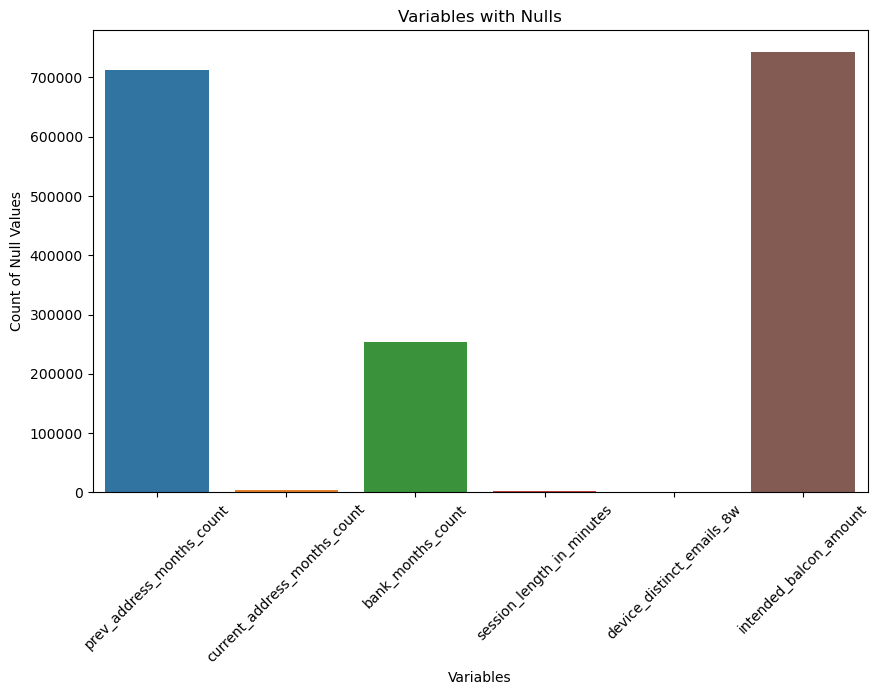

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=null_col_counts.index, y=null_col_counts.values)
plt.title('Variables with Nulls')
plt.xlabel('Variables')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Overview of Numeric Features
numeric_feats = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request',
                 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'date_of_birth_distinct_emails_4w',
                 'credit_risk_score','email_is_free' ,'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
                  'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count']
fraud_df[numeric_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.000000,0.562696,0.290343,0.100000,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.000000,0.493694,0.289125,0.000001,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,287080.000000,60.719967,63.578187,5.000000,25.000000,34.000000,72.000000,383.000000
current_address_months_count,995746.000000,86.962058,88.409289,0.000000,20.000000,53.000000,130.000000,428.000000
customer_age,1000000.000000,33.689080,12.025799,10.000000,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.000000,1.025705,5.381835,0.000000,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,257477.000000,36.582496,23.236885,0.000054,20.403236,32.433701,49.586253,112.956928
zip_count_4w,1000000.000000,1572.692049,1005.374565,1.000000,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.000000,5665.296605,3009.380665,-170.603072,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.000000,4769.781965,1479.212612,1300.307314,3593.179135,4749.921161,5752.574191,9506.896596


From here, it can be seen that there are some features which does not provide any valuable information. Take for example the variable device_feature_count, a binary column which appears to consist of only 0 values. Since this does not provide any meaningful information whatsoever, this variable can be dropped from the dataset.

In [12]:
# Dropping unnecessary columns
fraud_df.drop('device_fraud_count', axis=1, inplace=True)
numeric_feats = ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request',
                 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'date_of_birth_distinct_emails_4w',
                 'credit_risk_score','email_is_free' ,'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
                  'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

Additionally, recall the columns with missing observations. There are models which need full data (i.e. no null or NaNs), so this  can be dealt with by either (a) dropping the observation altogether or (b) imputing with some value such as the mean, median, or mode. The consequence of (a) is data loss, so a much better approach would be to impute. On the value which will be used in the imputation, we can try to check the distributions of the columns with missing values.

On the other hand, for categorical variables, instead of getting their summary statistics, the figures that will be looked into shall be the frequency and proportions of the categories in each feature.

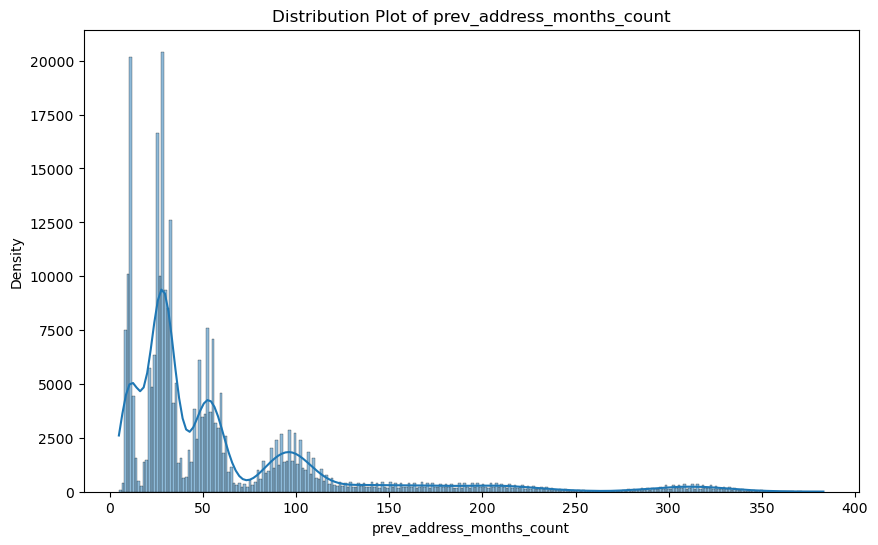

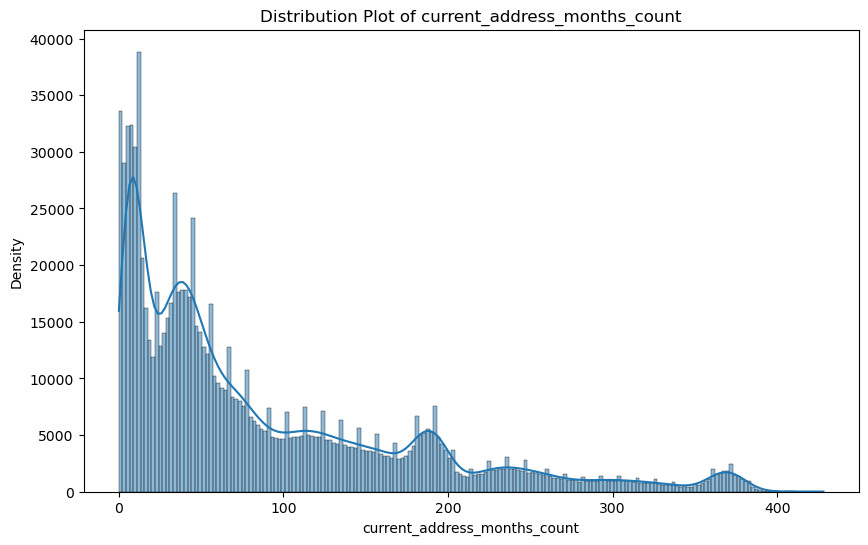

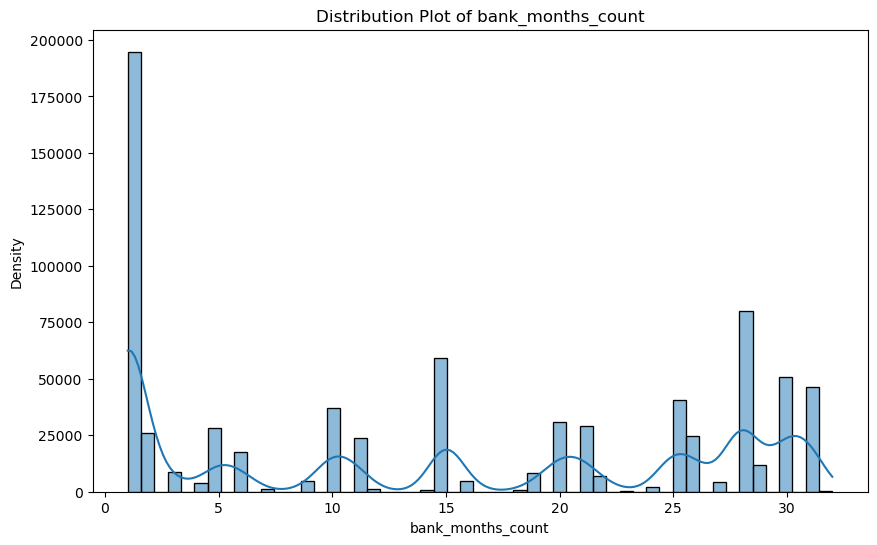

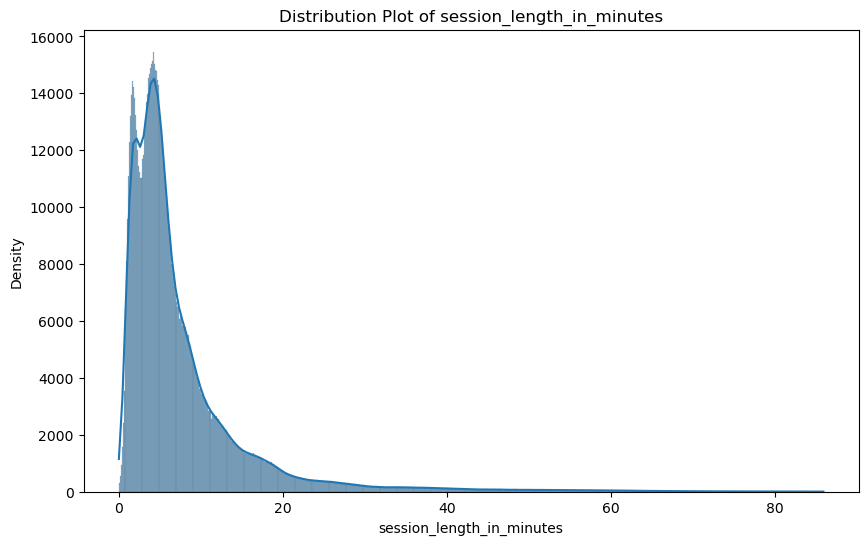

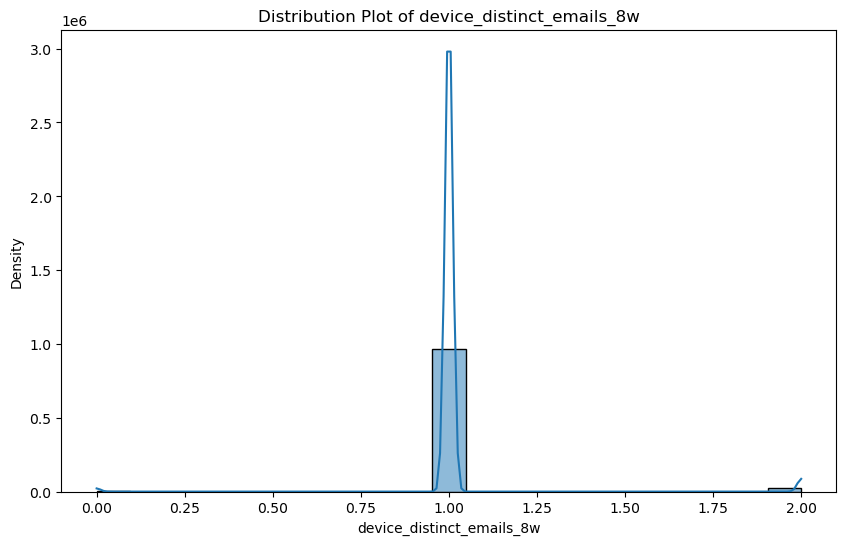

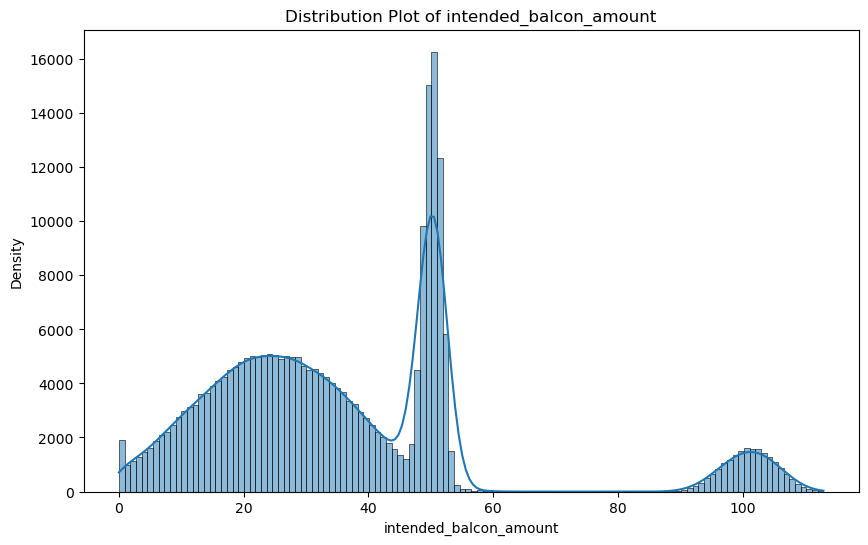

In [13]:
fraud_nulls = fraud_df[col_subset]

for column in fraud_nulls.columns:
    if pd.api.types.is_numeric_dtype(fraud_nulls[column]):
        # Create a distribution plot for numerical columns
        plt.figure(figsize=(10, 6))
        sns.histplot(data=fraud_nulls, x=column, kde=True)
        plt.title(f'Distribution Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

Since most of the variables indicated do not have a normal distribution, the median will be used for the imputation.

In [14]:
median_values = fraud_df[numeric_feats].median()
fraud_df[numeric_feats] = fraud_df[numeric_feats].fillna(median_values)

In [15]:
# Overview of Categorical Variables
cat_feats = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [16]:
def summ_stats_cat(variable):
    # Count of each category
    category_count = variable.value_counts()
    # Frequency of each category
    category_frequency = variable.value_counts(normalize=False)
    # Proportion of each category
    category_proportion = variable.value_counts(normalize=True)
    # Mode (most frequent category)
    category_mode = variable.mode()
    # Number of unique categories
    unique_categories = variable.nunique()

    print("Count of each category:\n", category_count)
    print("\nFrequency of each category:\n", category_frequency)
    print("\nProportion of each category:\n", category_proportion)
    print("\nMode (most frequent category):\n", category_mode)
    print("\nNumber of unique categories:", unique_categories)

In [17]:
# Payment Type
summ_stats_cat(fraud_df['payment_type'])

# Employment Status
summ_stats_cat(fraud_df['employment_status'])

# housing Status
summ_stats_cat(fraud_df['housing_status'])

# Source
summ_stats_cat(fraud_df['source'])

# Device OS
summ_stats_cat(fraud_df['device_os'])

Count of each category:
 AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64

Frequency of each category:
 AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64

Proportion of each category:
 AB   0.370554
AA   0.258249
AC   0.252071
AD   0.118837
AE   0.000289
Name: payment_type, dtype: float64

Mode (most frequent category):
 0    AB
Name: payment_type, dtype: object

Number of unique categories: 5
Count of each category:
 CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64

Frequency of each category:
 CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64

Proportion of each category:
 CA   0.730252
CB   0.138288
CF   0.044034
CC   0.037758
CD   0.026522
CE   0.022693
CG   0.000453
Name: employment_status, dtype: float64

Mode (most frequent cat

In [18]:
# Recoding categorical variables into dummy variables
fraud_df = pd.get_dummies(fraud_df)
fraud_df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count           float64
current_address_months_count        float64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
credit_risk_score                     int64
email_is_free                         int64
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                   float64
has_other_cards                       int64
proposed_credit_limit               float64
foreign_request                       int64
session_length_in_minutes       

                 0      1
fraud_bool  988971  11029
1.1151995356790039


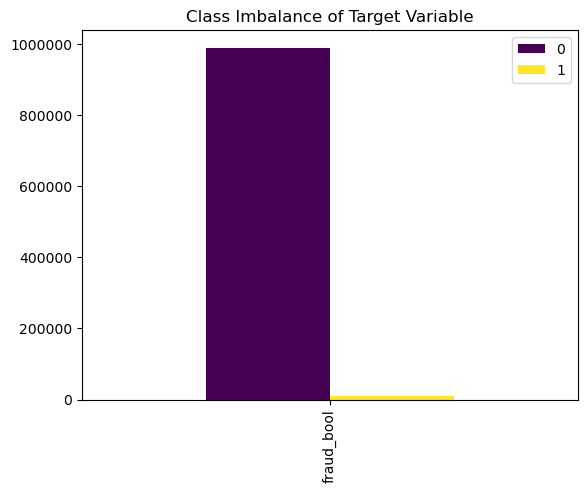

In [19]:
# Checking the class imbalance in the dataset
col = 'fraud_bool'
series = fraud_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T
print(tmp_df)
print((11029/988971)*100)

tmp_df.plot.bar(title='Class Imbalance of Target Variable',cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

As expected, like in almost all fraud detection use cases, there is a class imbalance between legitimate (tagged as 0) and fraud  (tagged as 1) events. Currently, in the dataset, the minority class (fraud) roughly represents only 1.1152% of the whole dataset. The presence of class imbalance in the problem is indicative that resampling methods might be necessary, depending on the approach that will be undertaken.

## Train - Test Split

In [116]:
X = fraud_df.drop("fraud_bool", axis = 1)
y = fraud_df["fraud_bool"]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis

In [22]:
y_train.value_counts()

0    791080
1      8920
Name: fraud_bool, dtype: int64

                 0     1
fraud_bool  791080  8920
1.1151995356790039


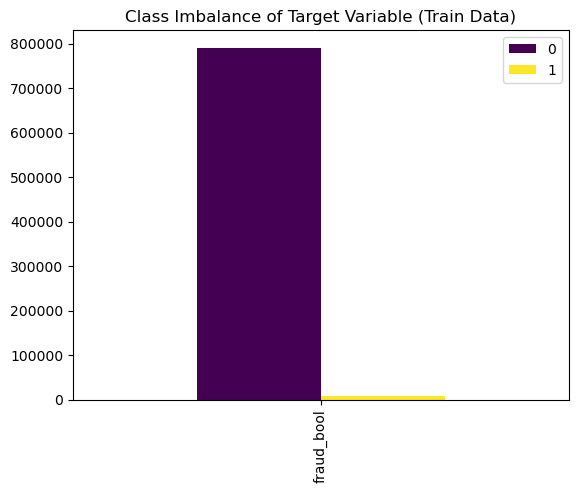

In [23]:
# Checking the class imbalance in the train dataset
#col = 'fraud_bool'
series = y_train
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T
print(tmp_df)
print((11029/988971)*100)

tmp_df.plot.bar(title='Class Imbalance of Target Variable (Train Data)',cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [24]:
train_data = pd.concat([X_train, y_train], axis = 1)

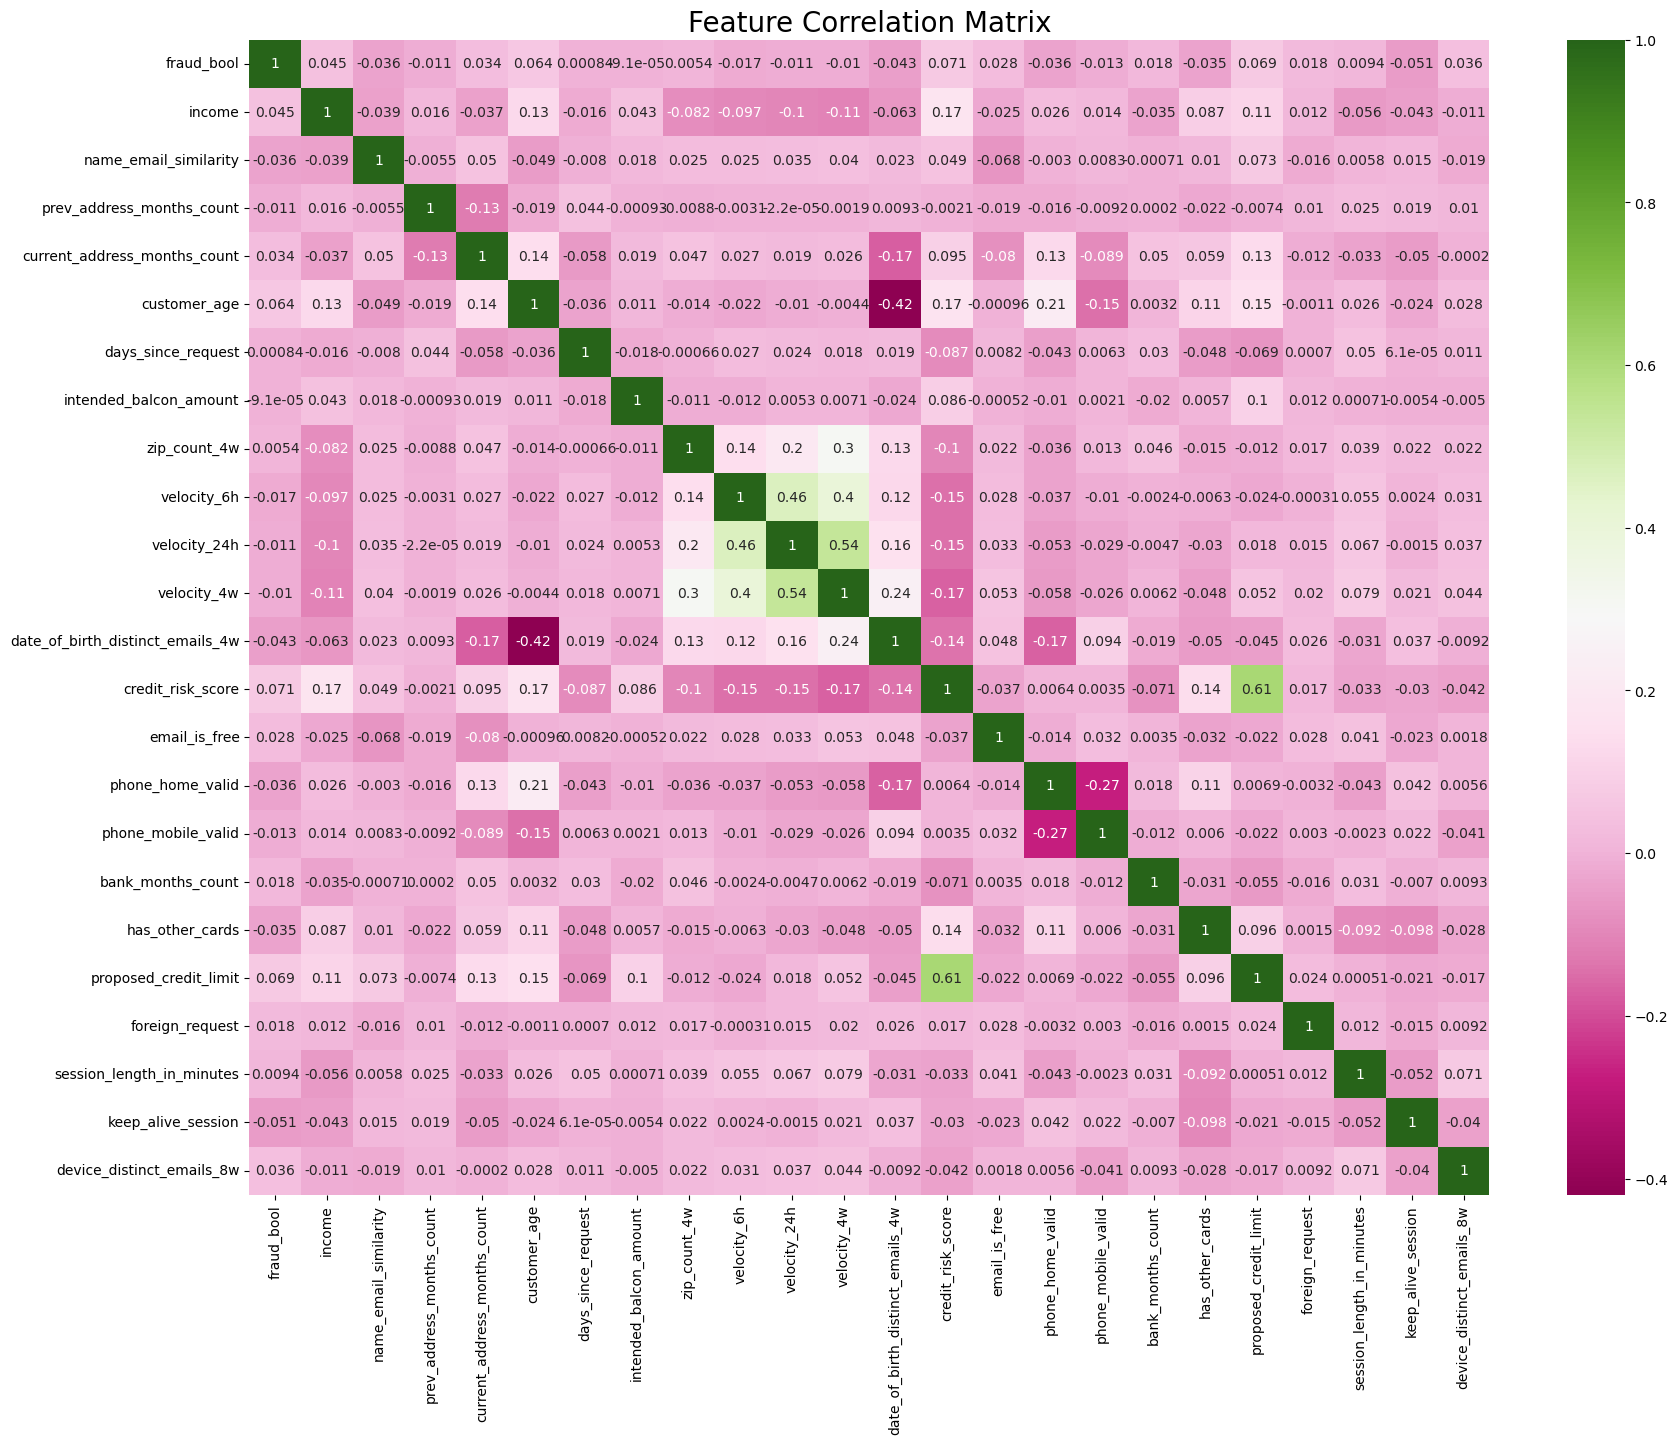

In [25]:
plt.figure(figsize=(20,15)) 
sns.heatmap(train_data[np.append('fraud_bool', numeric_feats)].corr(), annot=True, cmap='PiYG') 
plt.title("Feature Correlation Matrix",fontsize=20) 
plt.show()

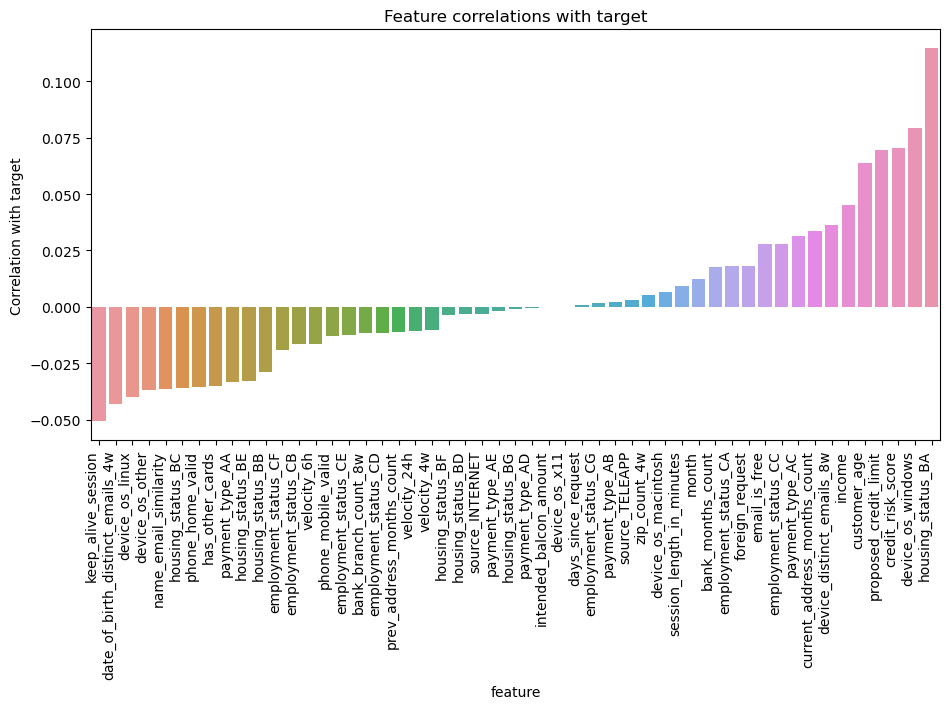

In [26]:
# Correlation coefficient between features and target

fig = plt.figure(figsize=(9.6,7.2))

corr_target = pd.DataFrame(X_train
                           .corrwith(y_train)).reset_index()

corr_target.columns = ['feature','target_correlation']
corr_target = corr_target.sort_values(by='target_correlation')

ax = sns.barplot(data=corr_target,x='feature',y='target_correlation')
ax.set_title('Feature correlations with target')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Correlation with target')

fig.tight_layout()
plt.show()

## Feature Selection

In [27]:
# Importing mutual information gain
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([2.86958187e-02, 9.77559566e-04, 5.94352279e-02, 2.39169043e-03,
       4.34403947e-02, 4.57758986e-04, 1.01938029e-01, 0.00000000e+00,
       2.94300094e-04, 3.41042396e-04, 2.88499986e-04, 9.43016174e-04,
       1.06687020e-02, 3.36527725e-03, 1.23002670e-01, 8.55473617e-02,
       1.42034901e-01, 2.39236282e-02, 2.67958697e-02, 4.33348212e-02,
       7.64610303e-04, 1.34912843e-04, 1.34212722e-01, 1.65487409e-01,
       2.11002286e-02, 3.53355601e-02, 6.83285444e-02, 3.29966342e-02,
       7.44385639e-03, 0.00000000e+00, 1.54908547e-01, 1.02221154e-02,
       1.67519797e-03, 5.81736914e-04, 7.79189356e-04, 2.34098992e-03,
       0.00000000e+00, 1.90127965e-02, 3.58728925e-02, 7.01565815e-02,
       6.41249719e-04, 1.57221504e-02, 0.00000000e+00, 0.00000000e+00,
       1.68146373e-01, 8.73265722e-05, 5.75361361e-02, 2.98188810e-03,
       6.05066689e-02, 3.79973661e-02, 8.59858100e-05])

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

source_INTERNET                    0.168146
device_distinct_emails_8w          0.165487
employment_status_CA               0.154909
phone_mobile_valid                 0.142035
keep_alive_session                 0.134213
email_is_free                      0.123003
intended_balcon_amount             0.101938
phone_home_valid                   0.085547
housing_status_BC                  0.070157
payment_type_AB                    0.068329
device_os_other                    0.060507
prev_address_months_count          0.059435
device_os_linux                    0.057536
customer_age                       0.043440
proposed_credit_limit              0.043335
device_os_windows                  0.037997
housing_status_BB                  0.035873
payment_type_AA                    0.035336
payment_type_AC                    0.032997
income                             0.028696
has_other_cards                    0.026796
bank_months_count                  0.023924
month                           

<Axes: >

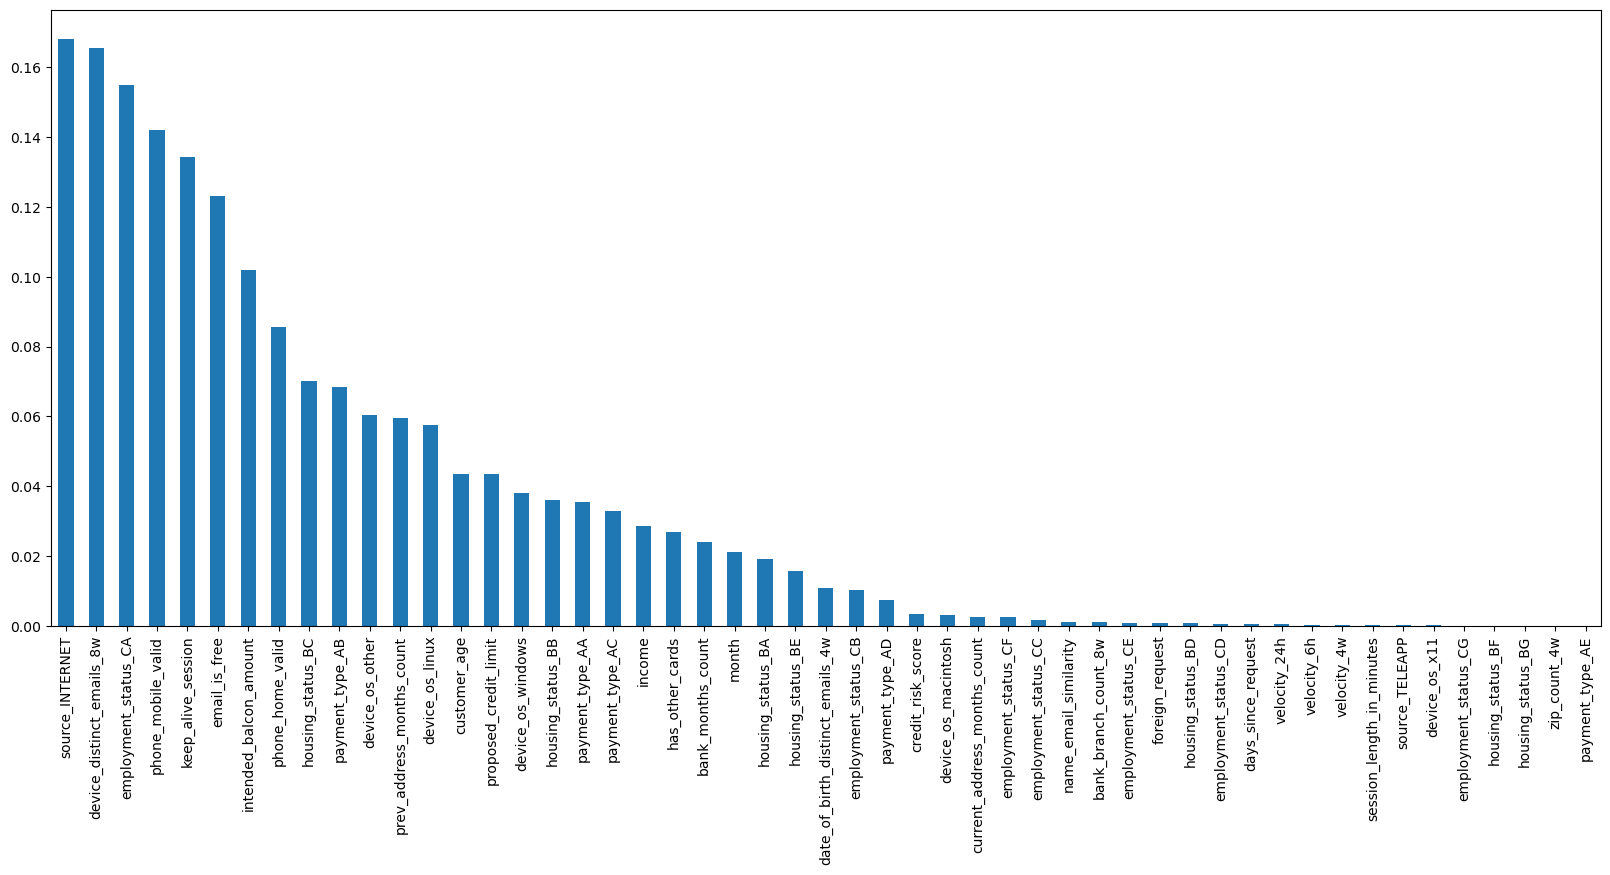

In [92]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [30]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['intended_balcon_amount', 'email_is_free', 'phone_mobile_valid',
       'keep_alive_session', 'device_distinct_emails_8w',
       'employment_status_CA', 'source_INTERNET'],
      dtype='object')

In [31]:
X_train_1 = X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']]

## Modelling

### Decision Tree

In [32]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 5, min_samples_leaf = 5, max_depth= 5)
fraud_tree_model = dtree.fit(X_train_1, y_train)

In [33]:
features = X_train_1.columns.tolist()

[Text(0.625, 0.875, 'keep_alive_session <= 0.977\ngini = 0.022\nsamples = 800000\nvalue = [791080, 8920]'),
 Text(0.5, 0.625, 'device_distinct_emails_8w <= 1.598\ngini = 0.034\nsamples = 338768\nvalue = [332883, 5885]'),
 Text(0.25, 0.375, 'employment_status_CA <= 0.146\ngini = 0.031\nsamples = 324985\nvalue = [319790, 5195]'),
 Text(0.125, 0.125, 'gini = 0.022\nsamples = 88368\nvalue = [87374, 994]'),
 Text(0.375, 0.125, 'gini = 0.035\nsamples = 236617\nvalue = [232416, 4201]'),
 Text(0.75, 0.375, 'employment_status_CA <= 0.384\ngini = 0.095\nsamples = 13783\nvalue = [13093, 690]'),
 Text(0.625, 0.125, 'gini = 0.071\nsamples = 4630\nvalue = [4459, 171]'),
 Text(0.875, 0.125, 'gini = 0.107\nsamples = 9153\nvalue = [8634, 519]'),
 Text(0.75, 0.625, 'gini = 0.013\nsamples = 461232\nvalue = [458197, 3035]')]

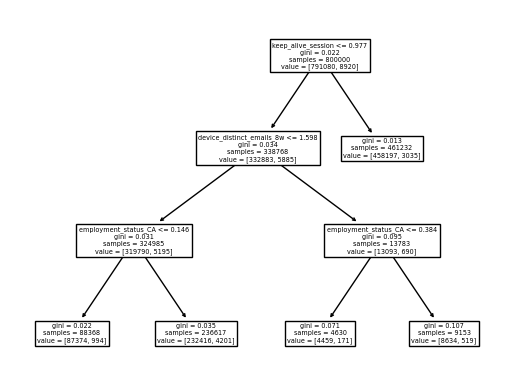

In [34]:
tree.plot_tree(fraud_tree_model, feature_names=features)

### Logistic Regression

#### Default Parameters

In [93]:
# Default parameters

logreg = LogisticRegression(random_state = 16)

In [43]:
# Fitting the model

logreg.fit(X_train_1, y_train)

LogisticRegression(random_state=16)

Feature: 0 - income, Score: -0.315829
Feature: 1 - name_email_similarity, Score: -0.957290
Feature: 2 - prev_address_months_count, Score: 0.935373
Feature: 3 - current_address_months_count, Score: 0.466239
Feature: 4 - customer_age, Score: -0.242329


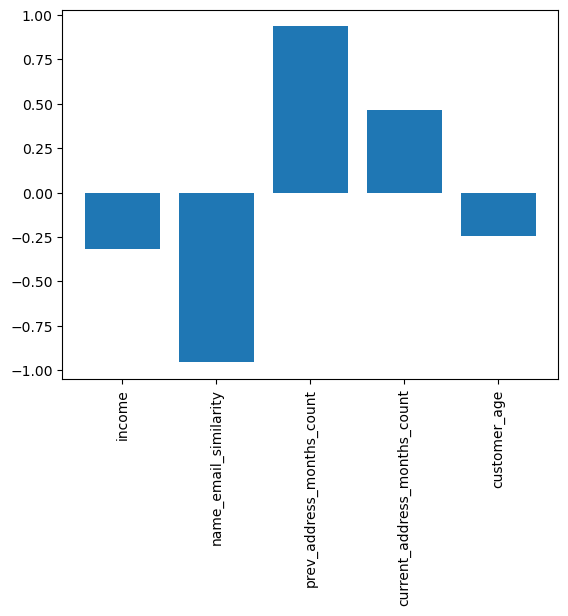

In [44]:
columns = X.columns
importance = logreg.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

#### Parameter tuning

In [106]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [111]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_1, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988850 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988850 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988850 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988850 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.988850 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988850 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988850 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.988850 (0.000000) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988850 (0.000000) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988850 (0.000000) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [112]:
# New parameters
logreg_pt = LogisticRegression(random_state = 16, C=1.0, penalty='l2', solver='newton-cg')

# Fitting the model
logreg_pt.fit(X_train_1, y_train)

LogisticRegression(random_state=16, solver='newton-cg')

Feature: 0 - income, Score: -0.308451
Feature: 1 - name_email_similarity, Score: -0.941875
Feature: 2 - prev_address_months_count, Score: 1.031437
Feature: 3 - current_address_months_count, Score: 0.475431
Feature: 4 - customer_age, Score: -0.328593


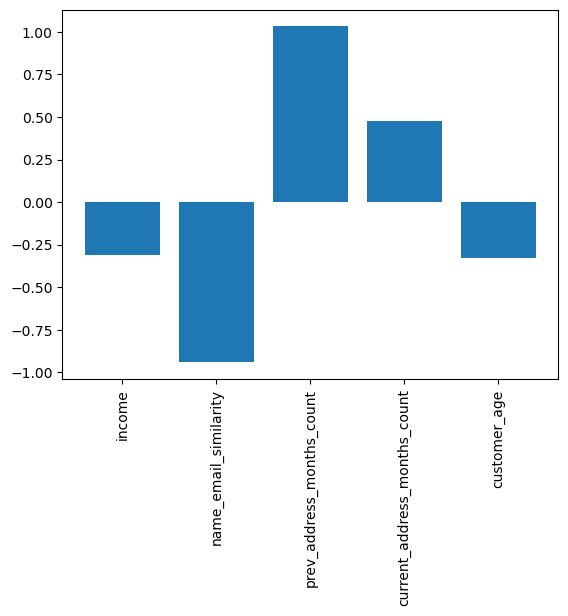

In [118]:
columns_pt = X.columns
importance_pt = logreg_pt.coef_[0]

for i,v in enumerate(importance_pt):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns_pt[i],v))

# plot feature importance
plt.bar([columns_pt[x] for x in range(len(importance_pt))], importance_pt)
plt.xticks(rotation=90)
plt.show()

## Performance Metrics

### Decision Tree

Accuracy:  0.989455
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


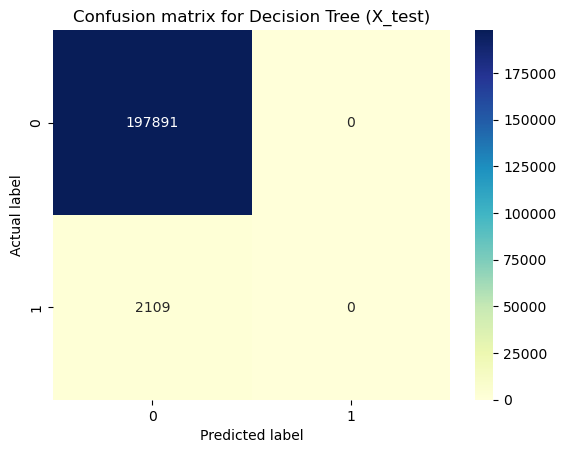

In [77]:
# predict against X_test
y_pred_dt = fraud_tree_model.predict(X_test[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_pred_dt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_test,y_pred_dt))
print("Precision score: ",precision_score(y_test,y_pred_dt))
print("Recall score: ",recall_score(y_test,y_pred_dt))
print("ROC-AUC Score: ", roc_auc_score(y_test,y_pred_dt))
print("Confusion matrix: ")
cnf_matrix_dt1 = confusion_matrix(y_test,y_pred_dt)

sns.heatmap(cnf_matrix_dt1, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Decision Tree (X_test)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.98885
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


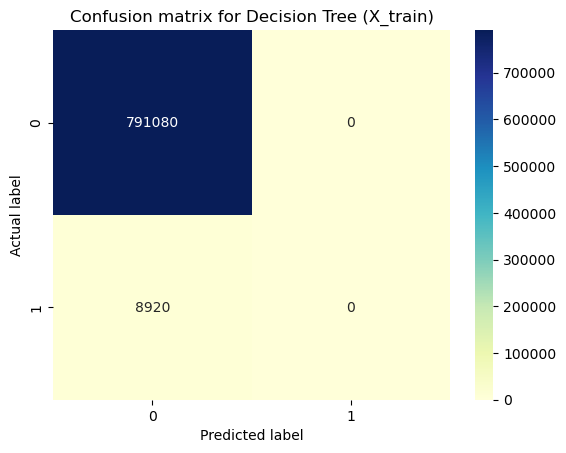

In [78]:
# predict against X_train
y_valid_dt = fraud_tree_model.predict(X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_valid_dt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_train,y_valid_dt))
print("Precision score: ",precision_score(y_train,y_valid_dt))
print("Recall score: ",recall_score(y_train,y_valid_dt))
print("ROC-AUC Score: ", roc_auc_score(y_train,y_valid_dt))
print("Confusion matrix: ")
cnf_matrix_dt2 = confusion_matrix(y_train,y_valid_dt)

sns.heatmap(cnf_matrix_dt2, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Decision Tree (X_train)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [39]:
comparative = pd.DataFrame({'Y_train': y_train, 'Y-valid': y_valid})
comparative


,Y_train,Y-valid
566853,0,0
382311,0,0
241519,0,0
719220,0,0
905718,0,0
...,...,...
259178,0,0
365838,0,0
131932,0,0
671155,0,0


### Logistic Regression

Accuracy:  0.989455
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


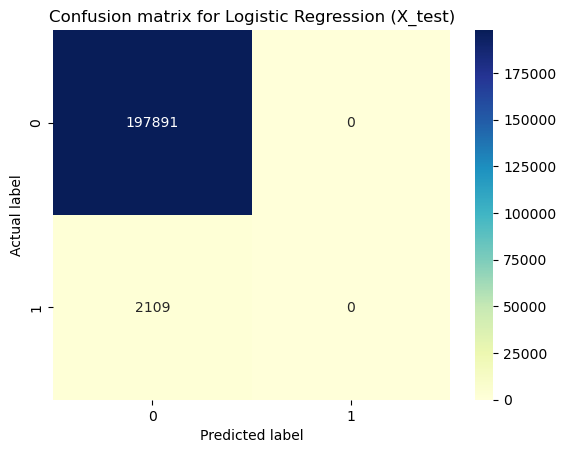

In [79]:
# predict against X_test
y_pred_lr = logreg.predict(X_test[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_pred_lr

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("Precision score: ",precision_score(y_test,y_pred_lr))
print("Recall score: ",recall_score(y_test,y_pred_lr))
print("ROC-AUC Score: ", roc_auc_score(y_test,y_pred_lr))
print("Confusion matrix: ")
cnf_matrix_lr1 = confusion_matrix(y_test,y_pred_lr)

sns.heatmap(cnf_matrix_dt1, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression (X_test)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.98885
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


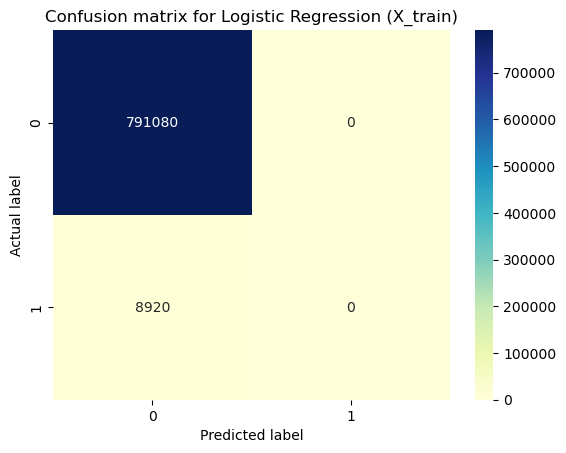

In [80]:
# predict against X_train
y_valid_lr = logreg.predict(X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_valid_lr

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_train,y_valid_lr))
print("Precision score: ",precision_score(y_train,y_valid_lr))
print("Recall score: ",recall_score(y_train,y_valid_lr))
print("ROC-AUC Score: ", roc_auc_score(y_train,y_valid_lr))
print("Confusion matrix: ")
cnf_matrix_lr2 = confusion_matrix(y_train,y_valid_lr)

sns.heatmap(cnf_matrix_lr2, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression (X_train)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.989455
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


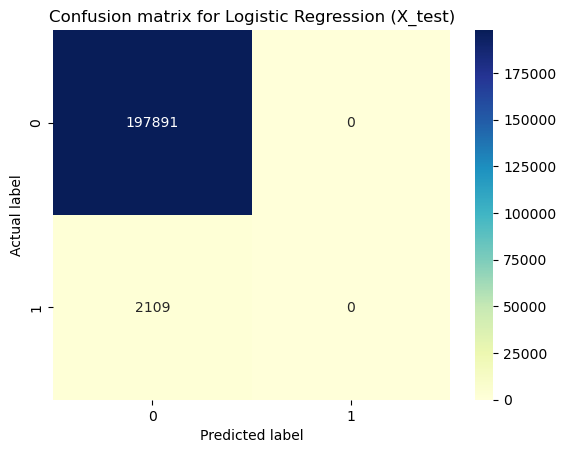

In [113]:
# predict against X_test
y_pred_lrpt = logreg_pt.predict(X_test[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_pred_lrpt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_test,y_pred_lrpt))
print("Precision score: ",precision_score(y_test,y_pred_lrpt))
print("Recall score: ",recall_score(y_test,y_pred_lrpt))
print("ROC-AUC Score: ", roc_auc_score(y_test,y_pred_lrpt))
print("Confusion matrix: ")
cnf_matrix_lrpt1 = confusion_matrix(y_test,y_pred_lrpt)

sns.heatmap(cnf_matrix_lrpt1, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression (X_test)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.98885
Precision score:  0.0
Recall score:  0.0
ROC-AUC Score:  0.5
Confusion matrix: 


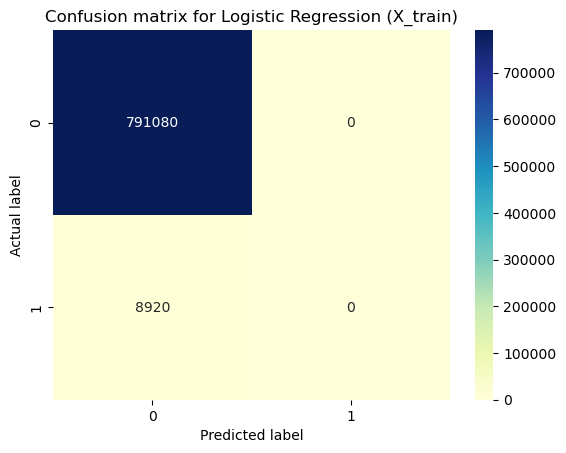

In [114]:
# predict against X_train
y_valid_lrpt = logreg_pt.predict(X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_valid_lrpt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_train,y_valid_lrpt))
print("Precision score: ",precision_score(y_train,y_valid_lrpt))
print("Recall score: ",recall_score(y_train,y_valid_lrpt))
print("ROC-AUC Score: ", roc_auc_score(y_train,y_valid_lrpt))
print("Confusion matrix: ")
cnf_matrix_lrpt2 = confusion_matrix(y_train,y_valid_lrpt)

sns.heatmap(cnf_matrix_lrpt2, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression (X_train)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Modelling with SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=24)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

                 0       1
fraud_bool  791080  791080
1.1151995356790039


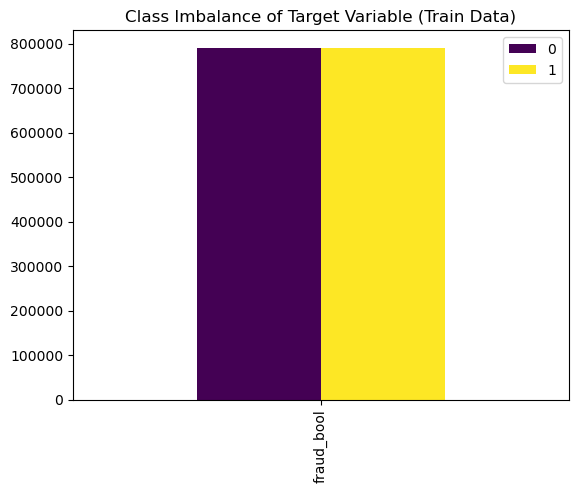

In [59]:
# Checking the class imbalance in the train dataset
#col = 'fraud_bool'
series = y_sm
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T
print(tmp_df)
print((11029/988971)*100)

tmp_df.plot.bar(title='Class Imbalance of Target Variable (Train Data)',cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [60]:
X_sm_1 = X_sm[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']]

### Decision Tree

In [61]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 5, min_samples_leaf = 5, max_depth= 5)
fraud_tree_model_sm = dtree.fit(X_sm_1, y_sm)

In [62]:
features = X_sm_1.columns.tolist()

[Text(0.625, 0.875, 'keep_alive_session <= 0.18\ngini = 0.5\nsamples = 1582160\nvalue = [791080, 791080]'),
 Text(0.5, 0.625, 'device_distinct_emails_8w <= 1.034\ngini = 0.438\nsamples = 1026067\nvalue = [332883, 693184]'),
 Text(0.25, 0.375, 'phone_mobile_valid <= 0.423\ngini = 0.461\nsamples = 888481\nvalue = [319790, 568691]'),
 Text(0.125, 0.125, 'gini = 0.321\nsamples = 180712\nvalue = [36349, 144363]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 707769\nvalue = [283441, 424328]'),
 Text(0.75, 0.375, 'device_distinct_emails_8w <= 1.879\ngini = 0.172\nsamples = 137586\nvalue = [13093, 124493]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 101575\nvalue = [0, 101575]'),
 Text(0.875, 0.125, 'gini = 0.463\nsamples = 36011\nvalue = [13093, 22918]'),
 Text(0.75, 0.625, 'gini = 0.29\nsamples = 556093\nvalue = [458197, 97896]')]

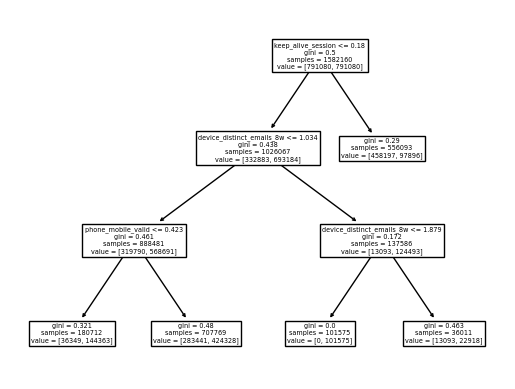

In [63]:
tree.plot_tree(fraud_tree_model_sm, feature_names=features)

### Logistic Regression

In [64]:
logreg_sm = LogisticRegression(random_state = 16)

In [65]:
# Fitting the model (SMOTE)

logreg_sm.fit(X_sm_1, y_sm)

LogisticRegression(random_state=16)

Feature: 0 - income, Score: -1.004668
Feature: 1 - name_email_similarity, Score: -2.223445
Feature: 2 - prev_address_months_count, Score: 0.979924
Feature: 3 - current_address_months_count, Score: -0.226246
Feature: 4 - customer_age, Score: -0.576927


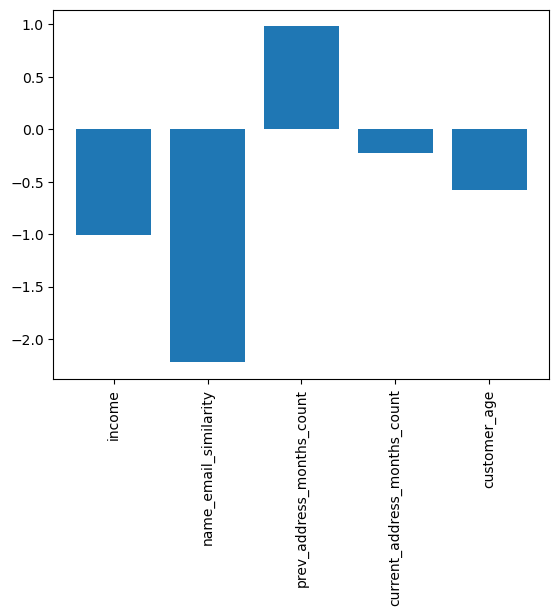

In [66]:
columns2 = X_sm.columns
importance2 = logreg_sm.coef_[0]

for i,v in enumerate(importance2):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns2[x] for x in range(len(importance2))], importance2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# New parameters
logreg_pt = LogisticRegression(random_state = 16, C=1.0, penalty='l2', solver='newton-cg')

# Fitting the model
logreg_pt.fit(X_sm_1, y_sm)


logreg_sm = LogisticRegression(random_state = 16)

# Fitting the model (SMOTE)

logreg_sm.fit(X_sm_1, y_sm)

columns2 = X_sm.columns
importance2 = logreg_sm.coef_[0]

for i,v in enumerate(importance2):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns2[x] for x in range(len(importance2))], importance2)
plt.xticks(rotation=90)
plt.show()

## Performance Metrics (SMOTE)

### Decision Tree

Accuracy:  0.58179
Precision score:  0.016325562081034584
Recall score:  0.6524419155998104
ROC-AUC Score:  0.6167394755697886
Confusion matrix: 


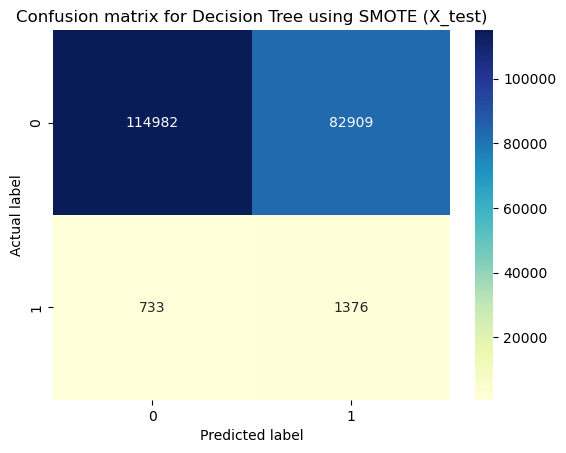

In [81]:
# predict against X_test
y_pred_sm_dt = fraud_tree_model_sm.predict(X_test[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_pred_sm_dt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_test,y_pred_sm_dt))
print("Precision score: ",precision_score(y_test,y_pred_sm_dt))
print("Recall score: ",recall_score(y_test,y_pred_sm_dt))
print("ROC-AUC Score: ", roc_auc_score(y_test,y_pred_sm_dt))
print("Confusion matrix: ")
cnf_matrix_sm_dt1 = confusion_matrix(y_test,y_pred_sm_dt)

sns.heatmap(cnf_matrix_sm_dt1, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Decision Tree using SMOTE (X_test)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.5801025
Precision score:  0.017371770651301185
Recall score:  0.6597533632286996
ROC-AUC Score:  0.619478871026293
Confusion matrix: 


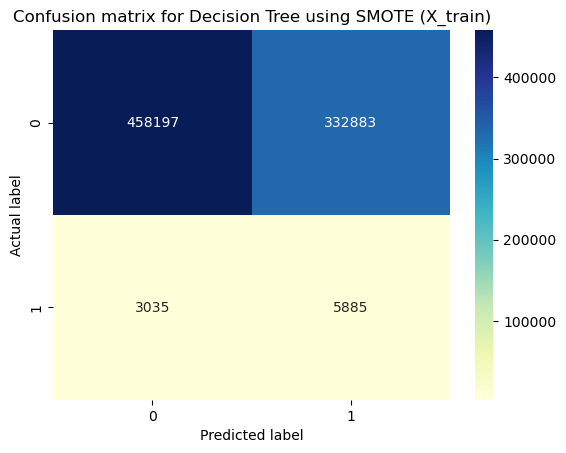

In [82]:
# predict against X_train
y_valid_sm_dt = fraud_tree_model_sm.predict(X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_valid_sm_dt

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_train,y_valid_sm_dt))
print("Precision score: ",precision_score(y_train,y_valid_sm_dt))
print("Recall score: ",recall_score(y_train,y_valid_sm_dt))
print("ROC-AUC Score: ", roc_auc_score(y_train,y_valid_sm_dt))
print("Confusion matrix: ")
cnf_matrix_sm_dt2 = confusion_matrix(y_train,y_valid_sm_dt)

sns.heatmap(cnf_matrix_sm_dt2, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Decision Tree using SMOTE (X_train)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Logistic Regression

Accuracy:  0.582615
Precision score:  0.016369082998502177
Recall score:  0.6529160739687055
ROC-AUC Score:  0.6173909242808948
Confusion matrix: 


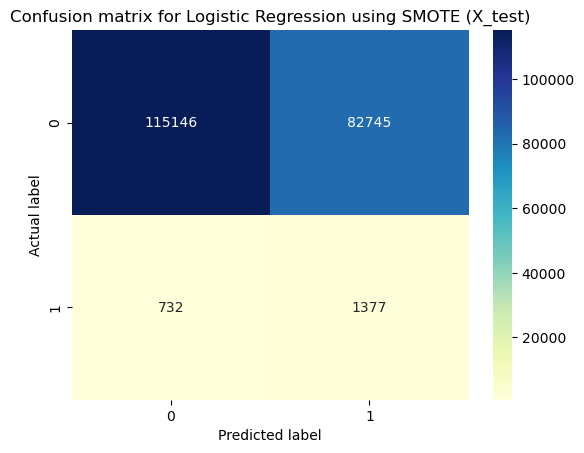

In [83]:
# predict against X_test
y_pred_sm_lr = logreg_sm.predict(X_test[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_pred_sm_lr

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_test,y_pred_sm_lr))
print("Precision score: ",precision_score(y_test,y_pred_sm_lr))
print("Recall score: ",recall_score(y_test,y_pred_sm_lr))
print("ROC-AUC Score: ", roc_auc_score(y_test,y_pred_sm_lr))
print("Confusion matrix: ")
cnf_matrix_sm_lr1 = confusion_matrix(y_test,y_pred_sm_lr)

sns.heatmap(cnf_matrix_sm_lr1, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression using SMOTE (X_test)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

Accuracy:  0.5807425
Precision score:  0.01730673700146662
Recall score:  0.6561659192825112
ROC-AUC Score:  0.6180289827994696
Confusion matrix: 


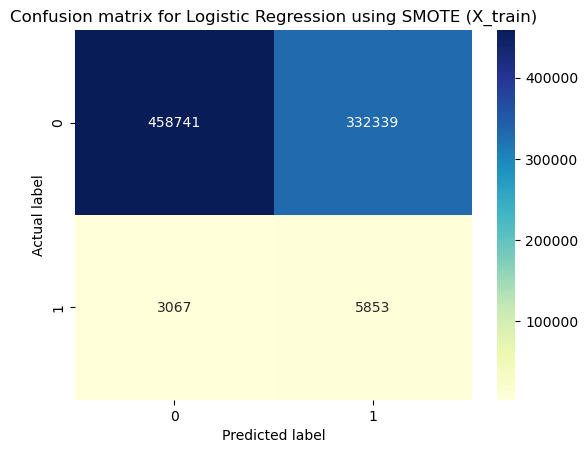

In [84]:
# predict against X_test
y_valid_sm_lr = logreg_sm.predict(X_train[['phone_mobile_valid', 'keep_alive_session', 'device_distinct_emails_8w', 'employment_status_CA', 'source_INTERNET']])
y_valid_sm_lr

# Evaluation metrics

print("Accuracy: ",accuracy_score(y_train,y_valid_sm_lr))
print("Precision score: ",precision_score(y_train,y_valid_sm_lr))
print("Recall score: ",recall_score(y_train,y_valid_sm_lr))
print("ROC-AUC Score: ", roc_auc_score(y_train,y_valid_sm_lr))
print("Confusion matrix: ")
cnf_matrix_sm_lr2 = confusion_matrix(y_train,y_valid_sm_lr)

sns.heatmap(cnf_matrix_sm_lr2, annot=True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix for Logistic Regression using SMOTE (X_train)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Summary of evaluation metrics

### Without SMOTE

In [88]:
# Against X_test
tmp_list = []
tmp_dict = {"Accuracy":accuracy_score(y_test,y_pred_dt), "Precision":precision_score(y_test,y_pred_dt), "Recall":recall_score(y_test,y_pred_dt),"ROC_AUC Score": roc_auc_score(y_test,y_pred_dt)}
tmp_list.append(tmp_dict)
tmp_dict = {"Accuracy":accuracy_score(y_test,y_pred_lr), "Precision":precision_score(y_test,y_pred_lr), "Recall":recall_score(y_test,y_pred_lr),"ROC_AUC Score":roc_auc_score(y_test,y_pred_lr)}
tmp_list.append(tmp_dict)

scores_df = pd.DataFrame(tmp_list)
scores_df.index = ['Decision Tree','Logistic Regression']
scores_df

,Accuracy,Precision,Recall,ROC_AUC Score
Decision Tree,0.989455,0.000000,0.000000,0.500000
Logistic Regression,0.989455,0.000000,0.000000,0.500000


### With SMOTE

In [89]:
# Against X_test
tmp_list2 = []
tmp_dict2 = {"Accuracy":accuracy_score(y_test,y_pred_sm_dt), "Precision":precision_score(y_test,y_pred_sm_dt), "Recall":recall_score(y_test,y_pred_sm_dt),"ROC_AUC Score": roc_auc_score(y_test,y_pred_sm_dt)}
tmp_list2.append(tmp_dict2)
tmp_dict2 = {"Accuracy":accuracy_score(y_test,y_pred_sm_lr), "Precision":precision_score(y_test,y_pred_sm_lr), "Recall":recall_score(y_test,y_pred_sm_lr),"ROC_AUC Score":roc_auc_score(y_test,y_pred_sm_lr)}
tmp_list2.append(tmp_dict2)

scores_df2 = pd.DataFrame(tmp_list2)
scores_df2.index = ['Decision Tree','Logistic Regression']
scores_df2

,Accuracy,Precision,Recall,ROC_AUC Score
Decision Tree,0.581790,0.016326,0.652442,0.616739
Logistic Regression,0.582615,0.016369,0.652916,0.617391


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.500
Logistic Regression: ROC AUC=0.500
Decision Tree with SMOTE: ROC AUC=0.617
Logistic Regression with SMOTE: ROC AUC=0.617


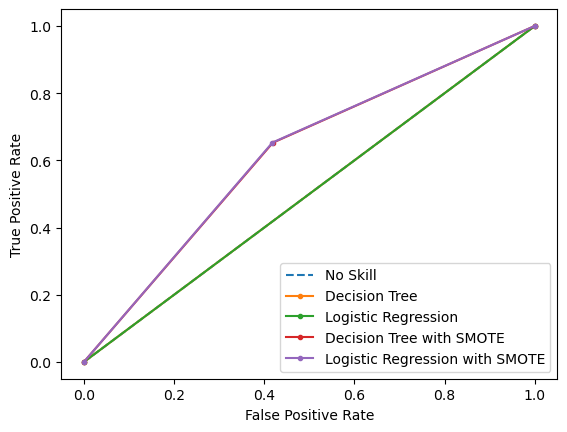

In [91]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = y_pred_dt
lr_probs = y_pred_lr
dt_sm_probs = y_pred_sm_dt
lr_sm_probs = y_pred_sm_lr

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
dt_sm_auc = roc_auc_score(y_test, dt_sm_probs)
lr_sm_auc = roc_auc_score(y_test, lr_sm_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
print('Decision Tree with SMOTE: ROC AUC=%.3f' % (dt_sm_auc))
print('Logistic Regression with SMOTE: ROC AUC=%.3f' % (lr_sm_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_sm_fpr, dt_sm_tpr, _ = roc_curve(y_test, dt_sm_probs)
lr_sm_fpr, lr_sm_tpr, _ = roc_curve(y_test, lr_sm_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(dt_sm_fpr, dt_sm_tpr, marker='.', label='Decision Tree with SMOTE')
plt.plot(lr_sm_fpr, lr_sm_tpr, marker='.', label='Logistic Regression with SMOTE')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()